In [1]:
import numpy as np
import matplotlib.pyplot as plt


Part 1

In [12]:

xMin = 1.2345
xMax = 2.3445
nn = 17
#values = np.linspace(xMin, xMax, nn)
x = np.zeros(nn)
for i in range(nn):
    x[i] = xMin + i*(xMax-xMin)/(nn-1)
x

array([1.2345  , 1.303875, 1.37325 , 1.442625, 1.512   , 1.581375,
       1.65075 , 1.720125, 1.7895  , 1.858875, 1.92825 , 1.997625,
       2.067   , 2.136375, 2.20575 , 2.275125, 2.3445  ])

Part 2

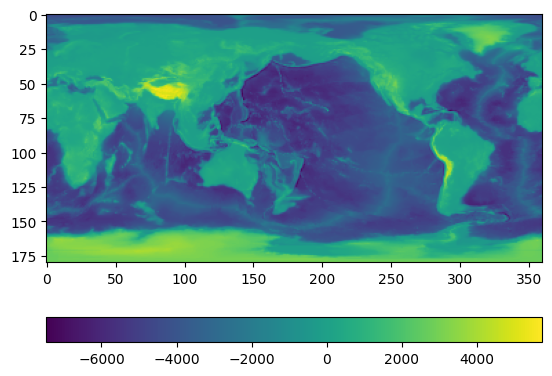

In [14]:
H = np.loadtxt('topography_180x360_grid.txt')
plt.imshow(H)
plt.colorbar(orientation = 'horizontal')
plt.show()

In [19]:
R = 6.3781*10**6
total_surface_area = 0
def calc_angle(i):                           #Simply calculate the angle in radians
    return i*np.pi/180


def calc_sa(i):                               #Simply calc the surface area given lat, long
    return abs(R**2*np.cos(calc_angle(i))*(np.pi/180)**2)

surface_areas = np.zeros((H.shape[0], H.shape[1]))
for i in range(H.shape[0]):
    for j in range(H.shape[1]):
        lat = 90-i - 0.5
        long = j - 180 + 0.5
        surface_area = calc_sa(lat)
        surface_areas[i][j] = surface_area
        #print('surface area at:', (lat,long), 'is:', surface_area)
        total_surface_area += surface_area

In [23]:
sa_underwater = 0
volume_underwater = 0
for i in range(H.shape[0]):
    for j in range(H.shape[1]):
        if H[i][j] < 0:
            volume_underwater += abs(H[i][j]*surface_areas[i][j])
            sa_underwater += surface_areas[i][j]
print('The percent of surface area underwaters is:', sa_underwater/total_surface_area *100)
print('The volume of underwater region is:', volume_underwater)

The percent of surface area underwaters is: 70.94268678857838
The volume of underwater region is: 1.3397093098332288e+18


Part 2.1

In [25]:
sa_underwater = 0
volume_underwater_meteor = 0
for i in range(H.shape[0]):
    for j in range(H.shape[1]):
        if H[i][j] + 380 < 0:
            volume_underwater_meteor += abs(H[i][j])*surface_areas[i][j]
            sa_underwater += surface_areas[i][j]
print('The percent of surface area underwaters is:', sa_underwater/total_surface_area *100)
print('The volume of underwater region apres un meteor hits is:', volume_underwater_meteor)

The percent of surface area underwaters is: 65.47166711855822
The volume of underwater region after a meteor hits is: 1.3364747315549036e+18


Part 2.2

In [26]:
sa_underwater = 0
volume_underwater_rise = 0
for i in range(H.shape[0]):
    for j in range(H.shape[1]):
        if H[i][j] - 850 < 0:
            volume_underwater_rise += abs(H[i][j])*surface_areas[i][j]
            sa_underwater += surface_areas[i][j]
print('The percent of surface area underwaters is:', sa_underwater/total_surface_area *100)
print('The volume of underwater region apres un meteor hits is:', volume_underwater_meteor)

The percent of surface area underwaters is: 91.18771075138041
The volume of underwater region apres un meteor hits is: 1.3364747315549036e+18


Part 2.3

In [230]:
sa_underwater = 0
volume_underwater_rise = 0
vals_to_try_sa = [1, 15, 30, 100, 105, 106, 107, 108, 109, 110, 120, 130, 140, 150] 
vals_to_try_vol = [600, 1000, 1350, 1360, 1365, 1367, 1369, 1370, 1400, 1450, 1500, 1800]
for rise in vals_to_try_vol:
    sa_underwater = 0
    volume_underwater_rise = 0
    for i in range(H.shape[0]):
        for j in range(H.shape[1]):
            if H[i][j] - rise < 0:
                volume_underwater_rise += abs(H[i][j])*surface_areas[i][j]
                sa_underwater += surface_areas[i][j]
    percent_change_sa = abs(sa_underwater/total_surface_area *100 - 70.94268678857838)
    percent_change_vol = (volume_underwater_rise/volume_underwater *100) - 100
    if percent_change_vol > 3.98 and percent_change_vol < 4.1:
        print('The percent of surface area underwaters is:', sa_underwater/total_surface_area *100)
        print('The volume of underwater region apres un meteor hits is:', volume_underwater_meteor)
        print(f'The percent change in volumne for a rise of {rise} meters is:', percent_change_vol)
        print('--------------------------------------------------------------------------------')

print('for a 4 percent increase in the total volume of water on earth, we would need to see a rise of between 1369 and 1370 meters in sea level.')

The percent of surface area underwaters is: 94.95191325907278
The volume of underwater region apres un meteor hits is: 1.3364747315549036e+18
The percent change in volumne for a rise of 1365 meters is: 3.9884204229107922
--------------------------------------------------------------------------------
The percent of surface area underwaters is: 94.9589358745915
The volume of underwater region apres un meteor hits is: 1.3364747315549036e+18
The percent change in volumne for a rise of 1367 meters is: 3.9920794309695964
--------------------------------------------------------------------------------
The percent of surface area underwaters is: 94.97375362467871
The volume of underwater region apres un meteor hits is: 1.3364747315549036e+18
The percent change in volumne for a rise of 1369 meters is: 3.999811500364814
--------------------------------------------------------------------------------
The percent of surface area underwaters is: 94.98424679383379
The volume of underwater region ap

For a 4 percent increase in the total volume of water on earth, we would need to see a rise of between 1369 and 1370 meters in sea level.

Part 3


In [60]:
lat_min = 33;
lat_max = 42;
lon_min = -125;
lon_max = -115;
lat_LAX = 33.9416
lon_LAX = -118.4085
lat_UCB = 37.8716
lon_UCB = -122.2727

In [120]:
CAC = np.loadtxt('CA_coast_line_no_islands.txt', usecols=(0,1)) 
CAB = np.loadtxt('CA_boundary2.txt', usecols=(0,1)) 
print(CAC.shape,CAB.shape)
CAC1 = np.append( CAC,  [[lon_min,max(CAC[:,1])]],axis=0)
CAC2 = np.append( CAC1, [[lon_min,min(CAC[:,1])]],axis=0)
ocean = CAC2.copy()
plate = np.loadtxt('plate.txt', usecols=(0,1)) 
print(plate[0])

(1282, 2) (1295, 2)
[-115.75283    33.383876]


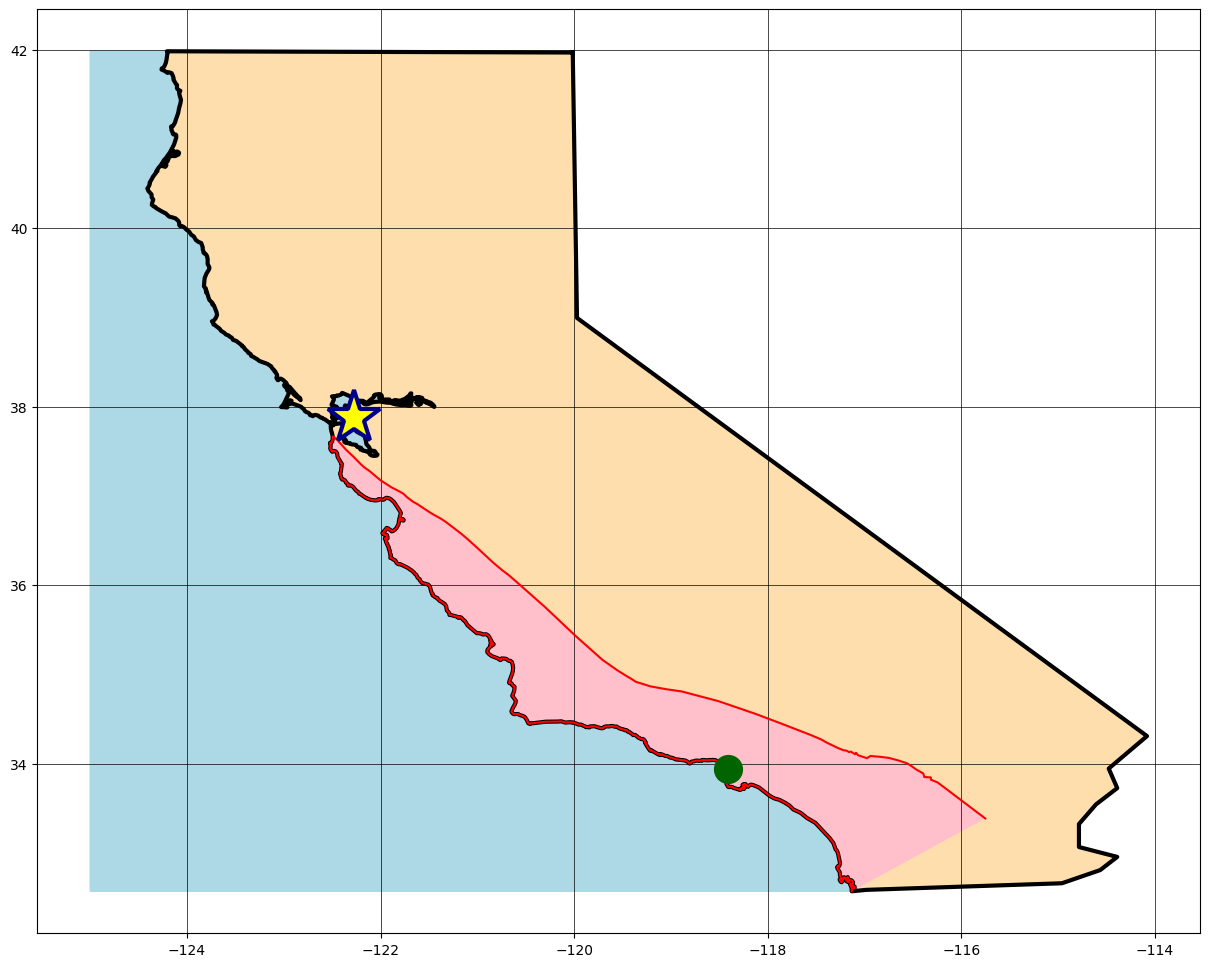

In [62]:
plt.rcParams['figure.figsize'] = [15, 12]

plt.plot(CAB[:,0],CAB[:,1],'k-',lw=3)
plt.fill(CAB[:,0],CAB[:,1],'navajowhite')

#plt.fill(land[:,0],land[:,1],'-',color='lightgrey')
plt.fill(ocean[:,0],ocean[:,1],'-',color='lightblue')

plt.plot(plate[:,0],plate[:,1],'r-')
plt.fill(plate[:,0],plate[:,1],'pink')

plt.plot(lon_LAX,lat_LAX,'o',color='darkgreen',ms=20)
plt.plot(lon_UCB,lat_UCB,'*',mec='darkblue',mew=3,mfc='yellow',ms=40)

plt.grid(color='k', linestyle='-', linewidth=0.5)
plt.show()

In [67]:
mill = 1*10**6
time_steps = [1*mill, 5*mill, 25*mill]
theta_move = 32*np.pi/180
deg_lat = 2*np.pi*R/360
deg_long = np.pi*R*np.cos(35.5*np.pi/180)/180

What I will need to do is to calculate how far the object will move in both latitude and longitude directions, then shift every point in the plate variable by these lat long movements.
To Calculate the movement, I will need to take cos(32) [the longitude shift], sin(32) [the latitude shift] and multiply that by the amount of time.

In [175]:
def mm_to_lat_long_change(distance, angle, lat, R = R):
    angle = angle*np.pi/180
    x_distance = distance*np.cos(angle)/(10**4)
    y_distance = distance*np.sin(angle)/(10**4)
    lat_move = (y_distance/R) * (180/np.pi)
    long_move =  (x_distance/R) * (180/np.pi)*np.cos(35.5 * np.pi/180)
    return [lat_move, long_move]


print(mm_to_lat_long_change(35, 32, 132))
print(np.shape(plate)[0])

[1.6661306757708695e-08, 2.1707303048388128e-08]
925


In [197]:
def movement(len_time, distance, angle, lat, long):
    angle = angle*np.pi/180
    x_distance = distance*np.cos(angle)/(10**4)
    y_distance = distance*np.sin(angle)/10**4
    lat_move =  len_time*(y_distance/R) * (180/np.pi)
    long_move = len_time* (x_distance/R) * (180/np.pi) / np.cos(lat * np.pi/180) 
    return [lat_move, long_move]
def movin_groovin(len_time, land, distance, angle):
    new_land = land.copy()
    shape_land = np.shape(new_land)
    lats = new_land[:, 1]
    longs = new_land[:, 0]
    for i in range(shape_land[0]):                    #index into each lat long position of the plate
        lat = lats[i]                               #collect the specific lattitude coordinate
        long = longs[i]                            #collect the specific longitude coordinate
        latlong_change = movement(distance = distance, angle = angle, len_time = len_time, lat = lat, long = long)     #Change in lat, long after one year
        #print(latlong_change)
        new_lat = lat + latlong_change[0]           #shift our lat to the next years position
        new_long = long - latlong_change[1]       #shift our long to the next years position
        new_land[i] = [new_long, new_lat] 
        new_UCB = [lon_UCB + latlong_change[1], lat_UCB + latlong_change[0]]  
        new_LAX = [lon_LAX - latlong_change[1], lat_LAX + latlong_change[0]]
    return new_land, new_UCB, new_LAX

def moveit_moveit(len_time, land, distance, angle):
    new_land = land.copy()
    for year in range(len_time):
        #print('year iteration:', year )
        shape_land = np.shape(land)
        lats = new_land[:, 1]
        longs = new_land[:, 0]                      #iterate over the time interval it is suposed to move
        for i in range(shape_land[0]):                    #index into each lat long position of the plate
            lat = lats[i]                               #collect the specific lattitude coordinate
            long = longs[i]                            #collect the specific longitude coordinate
            latlong_change = mm_to_lat_long_change(distance = distance, angle = angle, lat = lat )     #Change in lat, long after one year
            #print(latlong_change)
            new_lat = lat + latlong_change[0]           #shift our lat to the next years position
            new_long = long + latlong_change[1]       #shift our long to the next years position
            new_land[i] = [new_lat, new_long]         #update land
    return new_land

##This is gonna be quite slow over a million year, several times

#print(moveit_moveit(10000, land = plate, distance = 35, angle = 32))
print(plate)
movin_groovin(len_time = 10000000, land = plate, distance = 35, angle = 32)

[[-115.75283    33.383876]
 [-115.75283    33.383876]
 [-115.79378    33.417648]
 ...
 [-117.12409    32.606766]
 [-117.13395    32.592896]
 [-117.13219    32.568061]]


(array([[-116.07215427,   33.55048907],
        [-116.07215427,   33.55048907],
        [-116.11322841,   33.58426107],
        ...,
        [-117.44061445,   32.77337907],
        [-117.45042546,   32.75950907],
        [-117.44857781,   32.73467407]]),
 [-121.95631219485878, 38.03821306757709],
 [-118.72488780514122, 34.10821306757709])

In [195]:
# shifted_land = moveit_moveit(len_time = 100000, land = plate, distance = 35, angle = 32)
# plt.rcParams['figure.figsize'] = [15, 12]

# plt.plot(CAB[:,0],CAB[:,1],'k-',lw=3)
# plt.fill(CAB[:,0],CAB[:,1],'navajowhite')

# #plt.fill(land[:,0],land[:,1],'-',color='lightgrey')
# plt.fill(ocean[:,0],ocean[:,1],'-',color='lightblue')

# plt.plot(shifted_land[:,0],shifted_land[:,1],'r-')
# plt.fill(shifted_land[:,0],shifted_land[:,1],'pink')

# plt.plot(lon_LAX,lat_LAX,'o',color='darkgreen',ms=20)
# plt.plot(lon_UCB,lat_UCB,'*',mec='darkblue',mew=3,mfc='yellow',ms=40)

# plt.grid(color='k', linestyle='-', linewidth=0.5)
# plt.show()

In [ ]:
#Trial Run
shifted_land, new_UCB, new_LAX = movin_groovin(len_time = 10000000, land = plate, distance = 35, angle = 32)
print(shifted_land)
plt.rcParams['figure.figsize'] = [15, 12]

plt.plot(CAB[:,0],CAB[:,1],'k-',lw=3)
plt.fill(CAB[:,0],CAB[:,1],'navajowhite')

#plt.fill(land[:,0],land[:,1],'-',color='lightgrey')
plt.fill(ocean[:,0],ocean[:,1],'-',color='lightblue')

plt.plot(shifted_land[:,0],shifted_land[:,1],'r-')
plt.fill(shifted_land[:,0],shifted_land[:,1],'pink')

plt.plot(new_LAX[0],new_LAX[1],'o',color='darkgreen',ms=20)
plt.plot(lon_UCB,lat_UCB,'*',mec='darkblue',mew=3,mfc='yellow',ms=40)

plt.grid(color='k', linestyle='-', linewidth=0.5)
plt.show()

In [ ]:
#This is the model, I.E where we are now
plt.rcParams['figure.figsize'] = [15, 12]

plt.plot(CAB[:,0],CAB[:,1],'k-',lw=3)
plt.fill(CAB[:,0],CAB[:,1],'navajowhite')

#plt.fill(land[:,0],land[:,1],'-',color='lightgrey')
plt.fill(ocean[:,0],ocean[:,1],'-',color='lightblue')

plt.plot(plate[:,0],plate[:,1],'r-')
plt.fill(plate[:,0],plate[:,1],'pink')

plt.plot(lon_LAX,lat_LAX,'o',color='darkgreen',ms=20)
plt.plot(lon_UCB,lat_UCB,'*',mec='darkblue',mew=3,mfc='yellow',ms=40)

plt.grid(color='k', linestyle='-', linewidth=0.5)
plt.show()

In [196]:
# for time in time_steps:
#     shifted_land = moveit_moveit(len_time = time, land = plate, distance = 35, angle = 32)
#     plt.rcParams['figure.figsize'] = [15, 12]

#     plt.plot(CAB[:,0],CAB[:,1],'k-',lw=3)
#     plt.fill(CAB[:,0],CAB[:,1],'navajowhite')

# #plt.fill(land[:,0],land[:,1],'-',color='lightgrey')
#     plt.fill(ocean[:,0],ocean[:,1],'-',color='lightblue')

#     plt.plot(shifted_land[:,0],shifted_land[:,1],'r-')
#     plt.fill(shifted_land[:,0],shifted_land[:,1],'pink')

#     plt.plot(lon_LAX,lat_LAX,'o',color='darkgreen',ms=20)
#     plt.plot(lon_UCB,lat_UCB,'*',mec='darkblue',mew=3,mfc='yellow',ms=40)

#     plt.grid(color='k', linestyle='-', linewidth=0.5)
#     plt.show()
    

Part 3.1

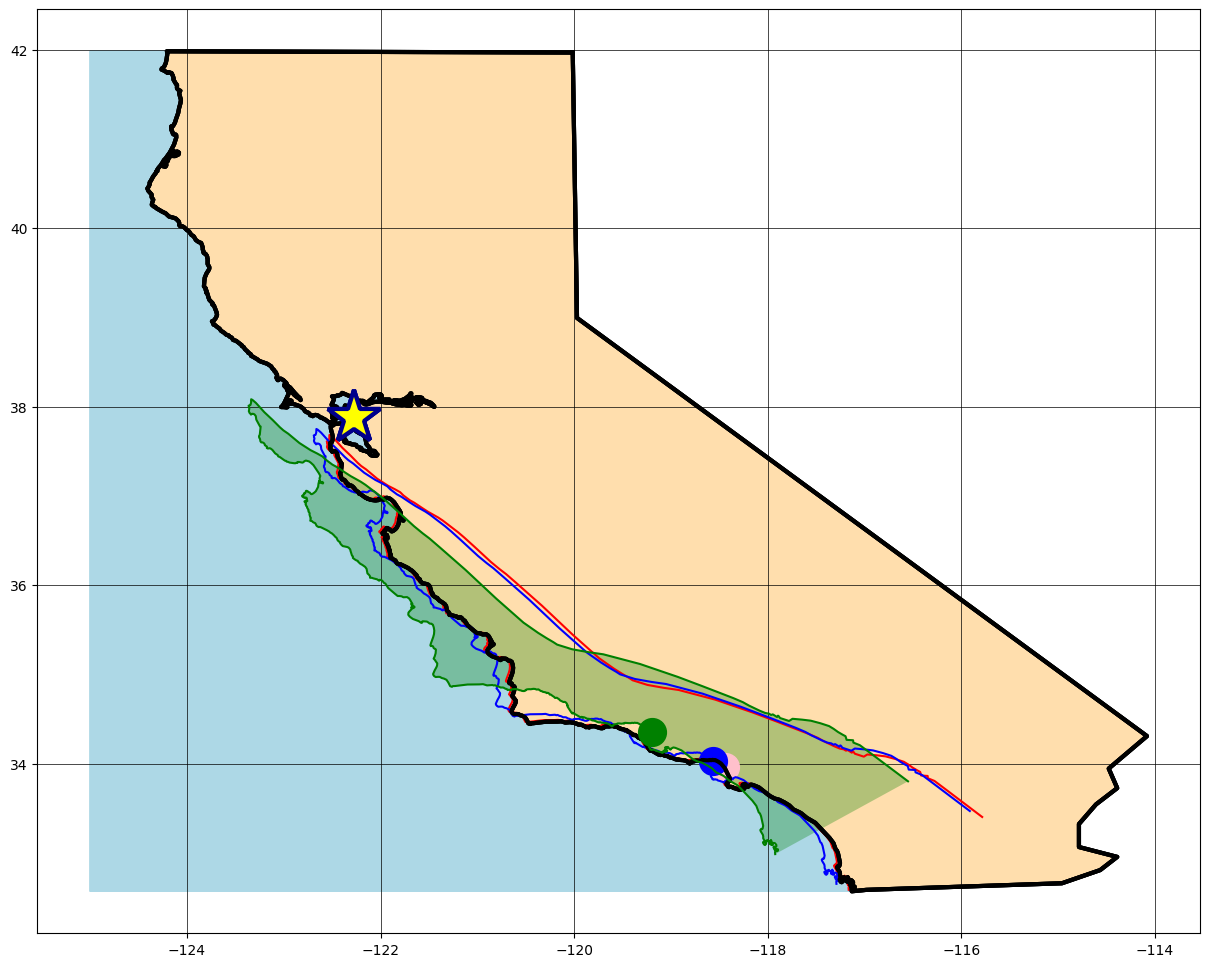

In [210]:
colors = ['pink', 'blue', 'green']
lines = ['r', 'b', 'g']
for i, lentime in enumerate(time_steps):
    shifted_land, new_UCB, new_LAX = movin_groovin(len_time = lentime, land = plate, distance = 35, angle = 32)
    #print(shifted_land)
    plt.rcParams['figure.figsize'] = [15, 12]

    plt.plot(CAB[:,0],CAB[:,1],'k-',lw=3)
    plt.fill(CAB[:,0],CAB[:,1],'navajowhite')

    plt.fill(ocean[:,0],ocean[:,1],'-',color='lightblue')

    plt.plot(shifted_land[:,0], shifted_land[:,1], f'{lines[i]}-')
    plt.fill(shifted_land[:,0], shifted_land[:,1], colors[i], alpha = .3)

    plt.plot(new_LAX[0],new_LAX[1],'o',color=colors[i],ms=20)
    plt.plot(lon_UCB,lat_UCB,'*',mec='darkblue',mew=3,mfc='yellow',ms=40)

    plt.grid(color='k', linestyle='-', linewidth=0.5)
plt.show()

Part 3.2

UCB lat: 37.8716 new LAX lat: 37.871169198805596
UCB lat: 37.8716 new LAX lat: 37.87165237670157
UCB lat: 37.8716 new LAX lat: 37.8716023927813


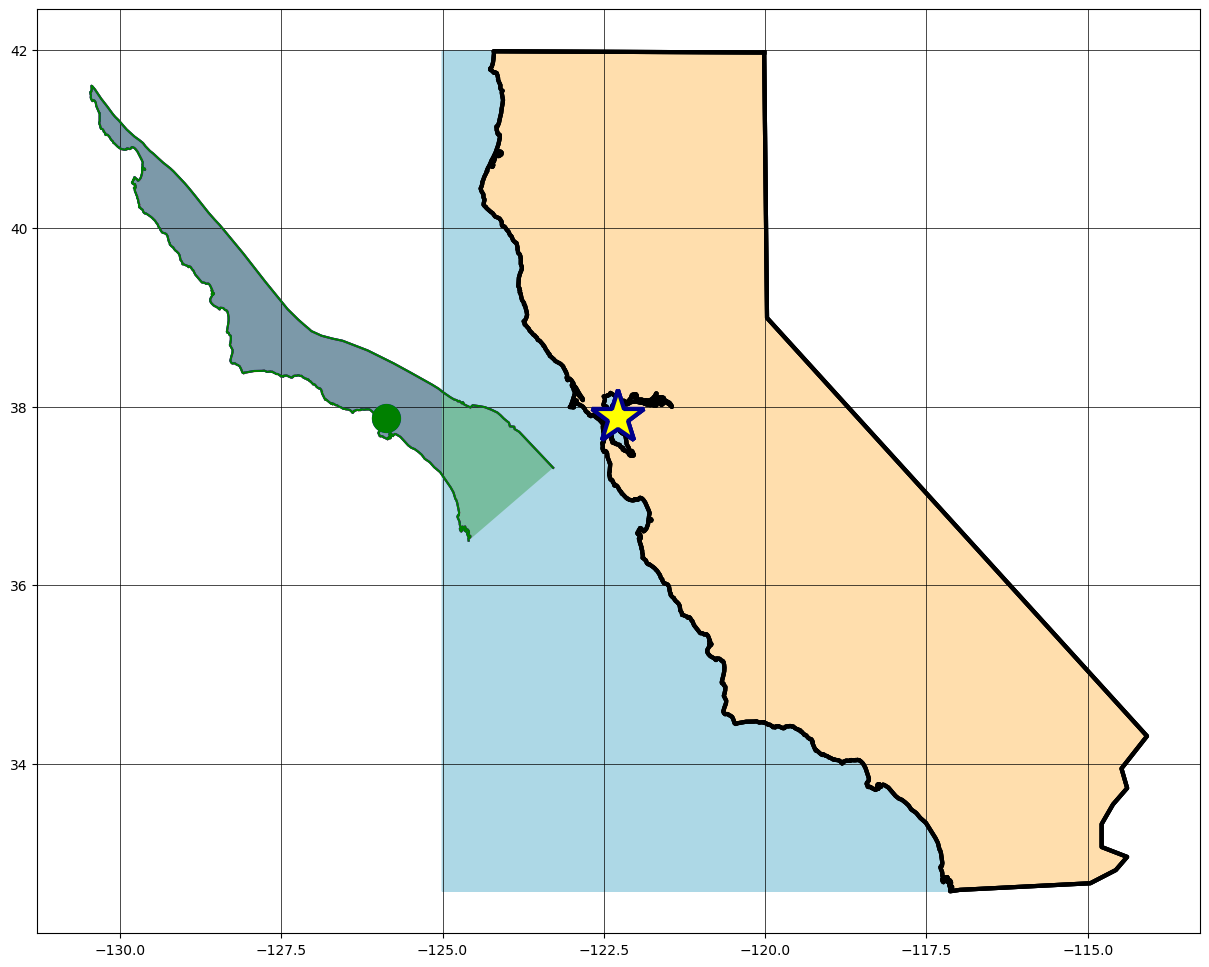

In [227]:
colors = ['pink', 'blue', 'green']
lines = ['r', 'b', 'g']
for i, lentime in enumerate([235.85*10**6, 235.879*10**6, 235.876*10**6]):
    shifted_land, new_UCB, new_LAX = movin_groovin(len_time = lentime, land = plate, distance = 35, angle = 32)
    #print(shifted_land)
    plt.rcParams['figure.figsize'] = [15, 12]

    plt.plot(CAB[:,0],CAB[:,1],'k-',lw=3)
    plt.fill(CAB[:,0],CAB[:,1],'navajowhite')

    plt.fill(ocean[:,0],ocean[:,1],'-',color='lightblue')

    plt.plot(shifted_land[:,0], shifted_land[:,1], f'{lines[i]}-')
    plt.fill(shifted_land[:,0], shifted_land[:,1], colors[i], alpha = .3)

    plt.plot(new_LAX[0],new_LAX[1],'o',color=colors[i],ms=20)
    plt.plot(lon_UCB,lat_UCB,'*',mec='darkblue',mew=3,mfc='yellow',ms=40)

    plt.grid(color='k', linestyle='-', linewidth=0.5)

    print('UCB lat:', lat_UCB, 'new LAX lat:', new_LAX[1])
plt.show()

In order to the LAX latitude to be within 1/10,000 of a degree, it would take in the range of 235.876 and 235.879 million years. This will give the latitude range of 37.81760 and 37.81765 which would round to 37.8176, or the given latitdue of berkeley.